## TASK-1 [Data preparation and customer analytics]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the Datasets

In [2]:
df_purchase=pd.read_csv('QVI_purchase_behaviour.csv')
df_transactions=pd.read_excel('QVI_transaction.xlsx')


# DATA CLEANING FOR CUSTOMER PURCHASE DATASET

In [3]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df_purchase.shape

(72637, 3)

## Check Data Types

In [5]:
pd.DataFrame({"Data type":df_purchase.dtypes})

,Data type
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object


# Check missing values

In [6]:
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Check Data Consistency

In [7]:
df_purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [8]:
df_purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

# DATA CLEANING FOR TRANSACTIONS DATASET

In [9]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Check for Data Types

In [10]:
pd.DataFrame({"Data type":df_transactions.dtypes})

,Data type
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [11]:
df_transactions.shape

(264836, 8)

## Statistical Information

In [12]:
df_transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Missing values check

In [13]:
df_transactions.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
df_transactions.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

## EXtract pack size from PROD_NAME Column

In [15]:
df_separated = (df_transactions['PROD_NAME'].str.extract(r'(?P<PROD_COMPANY>.*?)(?P<PACK_SIZE_GRAMS>\d+(?:\.\d+)?)')
                 .applymap(str.strip))
df_separated.head()

,PROD_COMPANY,PACK_SIZE_GRAMS
0,Natural Chip Compny SeaSalt,175
1,CCs Nacho Cheese,175
2,Smiths Crinkle Cut Chips Chicken,170
3,Smiths Chip Thinly S/Cream&Onion,175
4,Kettle Tortilla ChpsHny&Jlpno Chili,150


In [16]:
## Now Join the Separated and Transactions Tables
df_transactions.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
df_transactions=pd.merge(df_transactions, df_separated, left_index=True, right_index=True)
df_transactions.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_COMPANY,PACK_SIZE_GRAMS
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150


In [17]:
#drop the PROD_NAME
df_transactions.drop(columns='PROD_NAME', inplace=True)

In [18]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_COMPANY,PACK_SIZE_GRAMS
0,43390,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175
1,43599,1,1307,348,66,3,6.3,CCs Nacho Cheese,175
2,43605,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,43329,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175
4,43330,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150


In [19]:
## Rearrange The columns
new_order =[0,1,2,3,4,-2,-1,5,6]
df_transactions = df_transactions[df_transactions.columns[new_order]]

In [20]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_COMPANY,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8


## Get the company name and Brand Name

In [21]:
#split on the first spacing
df_transactions[['BRAND', 'COMPANY_NAME']] = df_transactions['PROD_COMPANY'].str.split(' ', 1, expand=True)

df_transactions.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_COMPANY,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES,BRAND,COMPANY_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,Natural,Chip Compny SeaSalt
1,43599,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,CCs,Nacho Cheese
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,Smiths,Crinkle Cut Chips Chicken
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0,Smiths,Chip Thinly S/Cream&Onion
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8,Kettle,Tortilla ChpsHny&Jlpno Chili


In [22]:
df_transactions.BRAND.isnull().sum()

0

In [23]:
## Rearrange the columns
new_order =[0,1,2,3,4,-2,-1,5,6,7,8]
df_transactions = df_transactions[df_transactions.columns[new_order]]
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,COMPANY_NAME,PROD_COMPANY,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural,Chip Compny SeaSalt,Natural Chip Compny SeaSalt,175,2,6.0
1,43599,1,1307,348,66,CCs,Nacho Cheese,CCs Nacho Cheese,175,3,6.3
2,43605,1,1343,383,61,Smiths,Crinkle Cut Chips Chicken,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,43329,2,2373,974,69,Smiths,Chip Thinly S/Cream&Onion,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,43330,2,2426,1038,108,Kettle,Tortilla ChpsHny&Jlpno Chili,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8


In [24]:
## Drop the PROD COMPANY
df_transactions.drop(columns='PROD_COMPANY', inplace=True)
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,COMPANY_NAME,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural,Chip Compny SeaSalt,175,2,6.0
1,43599,1,1307,348,66,CCs,Nacho Cheese,175,3,6.3
2,43605,1,1343,383,61,Smiths,Crinkle Cut Chips Chicken,170,2,2.9
3,43329,2,2373,974,69,Smiths,Chip Thinly S/Cream&Onion,175,5,15.0
4,43330,2,2426,1038,108,Kettle,Tortilla ChpsHny&Jlpno Chili,150,3,13.8


In [25]:
#saving the new transactions
df_transactions.to_csv('New_transaction.csv',index=False)

In [26]:
pd.DataFrame({"Data type":df_transactions.dtypes})

,Data type
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
BRAND,object
COMPANY_NAME,object
PACK_SIZE_GRAMS,object
PROD_QTY,int64
TOT_SALES,float64


In [27]:
from datetime import datetime
df_transactions["DATE"]=pd.to_datetime(df_transactions["DATE"]) #convert to datetume

#df_transactions['DATE'] = df_transactions['DATE'].dt.strftime('%d%m%Y')
df_transactions.tail()

#Would love to see how you guys went about the Date Column


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,COMPANY_NAME,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle,Sweet Chilli And Sour Cream,175,2,10.8
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos,Splash Of Lime,175,1,4.4
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos,Mexicana,170,2,8.8
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos,Corn Chip Mexican Jalapeno,150,2,7.8
264835,1970-01-01 00:00:00.000043365,272,272380,270189,74,Tostitos,Splash Of Lime,175,2,8.8


In [28]:
#Connvert to numeric data type
df_transactions["PACK_SIZE_GRAMS"]=pd.to_numeric(df_transactions["PACK_SIZE_GRAMS"]) #convert to numeric


In [29]:
df_transactions.isnull().sum()

DATE                  0
STORE_NBR             0
LYLTY_CARD_NBR        0
TXN_ID                0
PROD_NBR              0
BRAND                 0
COMPANY_NAME       3257
PACK_SIZE_GRAMS       0
PROD_QTY              0
TOT_SALES             0
dtype: int64

In [30]:
df_transactions.PROD_NBR.value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

# MERGE PURCHASE AND TRANSACTIONS

In [31]:
purchase_transaction_all=df_purchase.merge(df_transactions, how='left', on='LYLTY_CARD_NBR')
purchase_transaction_all.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,BRAND,COMPANY_NAME,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01 00:00:00.000043390,1,1,5,Natural,Chip Compny SeaSalt,175,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043359,1,2,58,Red,Rock Deli Chikn&Garlic Aioli,150,1,2.7
2,1003,YOUNG FAMILIES,Budget,1970-01-01 00:00:00.000043531,1,3,52,Grain,Waves Sour Cream&Chives,210,1,3.6
3,1003,YOUNG FAMILIES,Budget,1970-01-01 00:00:00.000043532,1,4,106,Natural,ChipCo Hony Soy Chckn,175,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043406,1,5,96,WW,Original Stacked Chips,160,1,1.9


In [32]:
purchase_transaction_all.shape

(264836, 12)

In [33]:
purchase_transaction_all.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PACK_SIZE_GRAMS,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,135.08011,1.351583e+05,56.583157,182.427004,1.907309,7.304200
std,8.057998e+04,76.78418,7.813303e+04,32.826638,64.327196,0.643654,3.083226
min,1.000000e+03,1.00000,1.000000e+00,1.000000,70.000000,1.000000,1.500000
25%,7.002100e+04,70.00000,6.760150e+04,28.000000,150.000000,2.000000,5.400000
50%,1.303575e+05,130.00000,1.351375e+05,56.000000,170.000000,2.000000,7.400000
75%,2.030942e+05,203.00000,2.027012e+05,85.000000,175.000000,2.000000,9.200000
max,2.373711e+06,272.00000,2.415841e+06,114.000000,380.000000,200.000000,650.000000


In [34]:
purchase_transaction_all.isnull().sum()


LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
BRAND                  0
COMPANY_NAME        3257
PACK_SIZE_GRAMS        0
PROD_QTY               0
TOT_SALES              0
dtype: int64

In [35]:
purchase_transaction_all.LYLTY_CARD_NBR.nunique()

## The number of unique customers

72637

# DATA EXPLORATION

In [36]:
sns.set(style="darkgrid")


## Distribution In Premium Customer Segments

Text(0.5, 1.0, 'Premium Customer Segments')

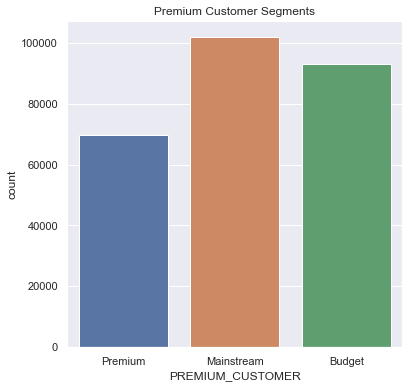

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='PREMIUM_CUSTOMER',data=purchase_transaction_all)
plt.title('Premium Customer Segments')


## Distribution Customer Life Stages

Text(0.5, 1.0, 'Customer Lifestages')

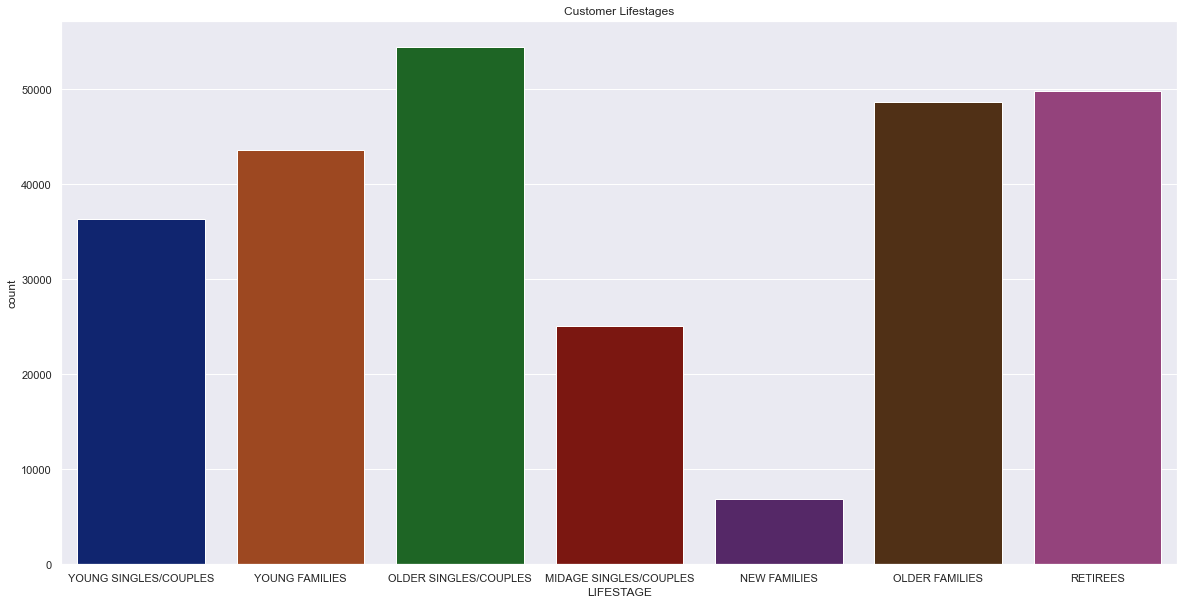

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x="LIFESTAGE", data=purchase_transaction_all,palette="dark")
plt.title("Customer Lifestages")

## DIstribution In Number of Times Similar Customer Purchased During the Period

In [39]:
Multi_Purchases=purchase_transaction_all.LYLTY_CARD_NBR.value_counts()
Multi_Purchases

162039     18
172032     18
13138      17
116181     17
128178     17
           ..
143033      1
143029      1
143027      1
143026      1
2373711     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Purchases By Single LYLTY_CARD_NBR ')

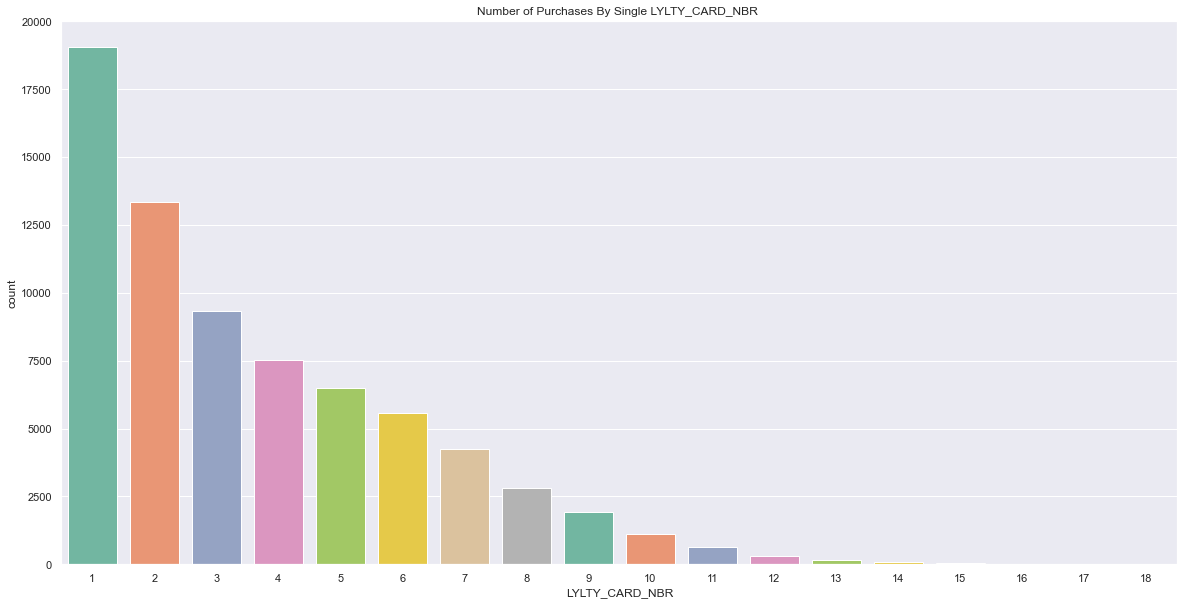

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(Multi_Purchases,palette="Set2")
plt.title('Number of Purchases By Single LYLTY_CARD_NBR ')


# This shows most customers Purchased Once during the period
# Highest number of times a single customer purchased during the period was 18 times

## Total Transactions Per LIfestage

Text(0.5, 1.0, 'Total Transactions Per Lifestage')

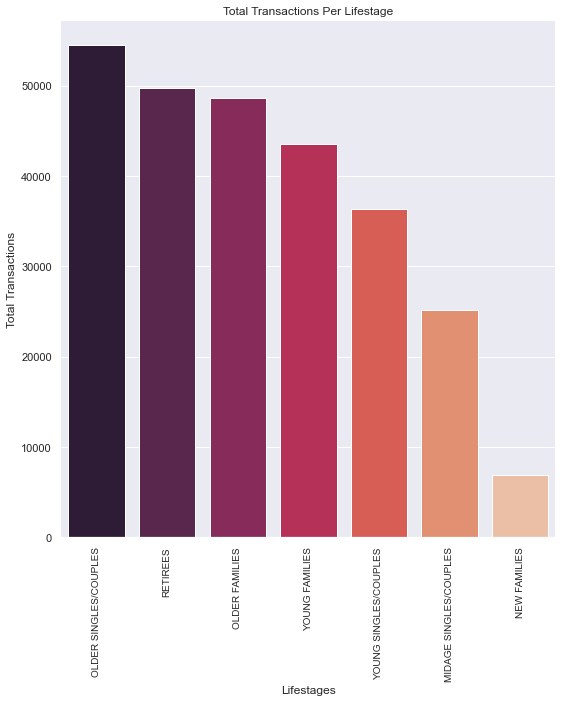

In [41]:
total_transactions=purchase_transaction_all.LIFESTAGE.value_counts().reset_index(name="TOT_SALES")
g=sns.catplot(x='index',y="TOT_SALES",data=total_transactions,height=8,kind='bar',palette='rocket')
g.despine(left=True)
g.set_xlabels("Lifestages")
g.set_ylabels("Total Transactions")
plt.xticks(rotation="vertical",size=10)

plt.title('Total Transactions Per Lifestage')


## Total Transactions Per Customer Premium-ship

Text(0.5, 1.0, 'Total Transactions Per Premium_customer')

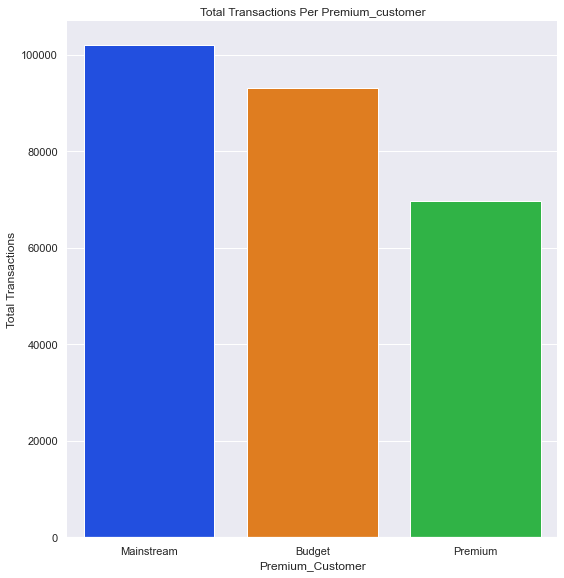

In [42]:
total_transactions=purchase_transaction_all.PREMIUM_CUSTOMER.value_counts().reset_index(name="PREMIUM_CUSTOMER")
g=sns.catplot(x='index',y="PREMIUM_CUSTOMER",data=total_transactions,height=8,kind='bar',palette='bright')
g.despine(left=True)
g.set_xlabels("Premium_Customer")
g.set_ylabels("Total Transactions")

plt.title('Total Transactions Per Premium_customer')


## Store_Wise Performance

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Performance Store_wise')

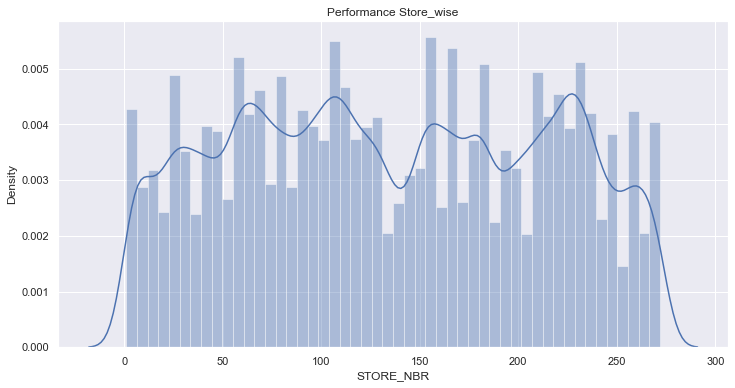

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(purchase_transaction_all.STORE_NBR)
plt.title('Performance Store_wise')

## Pack sizes Distribution In Grams

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

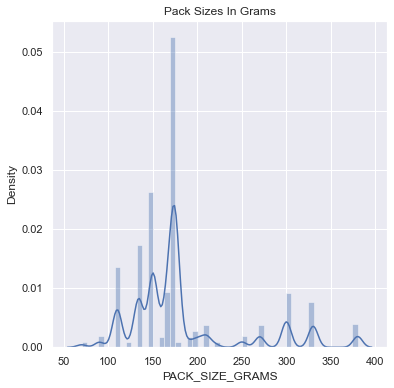

In [44]:
plt.figure(figsize=(6,6))
sns.distplot(purchase_transaction_all['PACK_SIZE_GRAMS'])
plt.title('Pack Sizes In Grams')
plt.show

## Distribution In Product Quantity

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

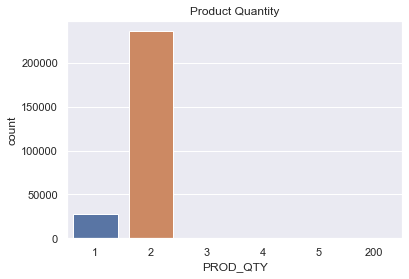

In [45]:
sns.countplot(purchase_transaction_all['PROD_QTY'])
plt.title('Product Quantity')
plt.show

# Most products are bought in pairs